## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""
Compile 模型
"""

model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

#optimizer = keras.optimizers.Adam(lr=0.001)
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.8635 - accuracy: 0.3304 - val_loss: 1.7304 - val_accuracy: 0.3810
Epoch 2/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.6481 - accuracy: 0.4133 - val_loss: 1.7105 - val_accuracy: 0.3929
Epoch 3/100
50000/50000 [==============================] - 2s 47us/step - loss: 1.5631 - accuracy: 0.4447 - val_loss: 1.6787 - val_accuracy: 0.4083
Epoch 4/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.4947 - accuracy: 0.4688 - val_loss: 1.4936 - val_accuracy: 0.4598
Epoch 5/100
50000/50000 [==============================] - 2s 44us/step - loss: 1.4395 - accuracy: 0.4900 - val_loss: 1.5718 - val_accuracy: 0.4419
Epoch 6/100
50000/50000 [==============================] - 2s 43us/step - loss: 1.3995 - accuracy: 0.5053 - val_loss: 1.5359 - val_accuracy: 0.4528
Epoch 7/100
50000/50000 [==============================] - 2s 

Epoch 56/100
50000/50000 [==============================] - 2s 41us/step - loss: 0.3350 - accuracy: 0.8802 - val_loss: 2.4285 - val_accuracy: 0.5112
Epoch 57/100
50000/50000 [==============================] - 2s 41us/step - loss: 0.3338 - accuracy: 0.8818 - val_loss: 2.2603 - val_accuracy: 0.5231
Epoch 58/100
50000/50000 [==============================] - 2s 41us/step - loss: 0.3256 - accuracy: 0.8843 - val_loss: 2.5112 - val_accuracy: 0.5032
Epoch 59/100
50000/50000 [==============================] - 2s 41us/step - loss: 0.3097 - accuracy: 0.8902 - val_loss: 2.2845 - val_accuracy: 0.5261
Epoch 60/100
50000/50000 [==============================] - 2s 41us/step - loss: 0.2897 - accuracy: 0.8988 - val_loss: 2.3755 - val_accuracy: 0.5184
Epoch 61/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.2877 - accuracy: 0.8979 - val_loss: 2.3666 - val_accuracy: 0.5136
Epoch 62/100
50000/50000 [==============================] - 2s 41us/step - loss: 0.2745 - accuracy: 0.9037

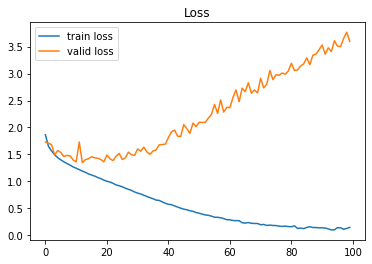

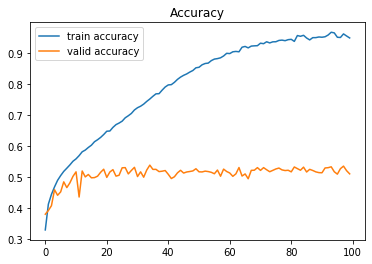

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()